In [2]:
pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 19.8 MB/s eta 0:00:00


In [3]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00


In [4]:
pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=393d9d08ee90b68e73935573c032f8d523fe3eaf15355da2e6fb401f9d690d2b
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


**1,2,3 are the editors where i have written codes for getting the output the rest of the code is just to show the output for different coordinates**

##**Importing the required library**

In [5]:
from astroquery.skyview import SkyView
from astropy.io import fits
from matplotlib.pyplot import *
from numpy import *
import requests
import cv2
from google.colab.patches import cv2_imshow
import os
from bs4 import BeautifulSoup
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**1.Code for obtaining image and storing in drive**

In [ ]:

# Specify the target coordinates and image parameters
target_coordinates = '240.669,37.35949'
image_size = 0.1  # Size of the image in degrees
survey = 'DSS2 Red'  # Choose the survey or source

# Query SkyView for the image
images = SkyView.get_image_list(
    position=target_coordinates,
    survey=survey,

    )

print(images)
image_url= images[0]
# Construct the URL with the target coordinates, survey, and pixel size

response = requests.get(image_url)
destination_path = os.path.join('/content/drive/MyDrive/HEA ','R.jpeg')
# Check the response status
if response.status_code == 200:
    # Save the image content to a local file
    with open('/content/drive/MyDrive/HEA', 'wb') as file:
        file.write(response.content)
    print('Image downloaded successfully.')
else:
    print(f"Failed to download image. Status code: {response.status_code}")

fits_image = fits.open('/content/drive/MyDrive/HEA')[0]

# Convert the FITS data to a NumPy array
fits_data = fits_image.data

# Normalize the data to the 0-255 range (adjust the scaling as needed)
min_value = fits_data.min()
max_value = fits_data.max()
scaled_data = 255 * (fits_data - min_value) / (max_value - min_value)
scaled_data = scaled_data.astype('uint8')

cv2.imwrite(destination_path, scaled_data)

['https://skyview.gsfc.nasa.gov/tempspace/fits/skv566938737201.fits']
Image downloaded successfully.


True

##**2.Code for downloading all 7 surveys and obtaining the stacked image by just giving the coordinate**

Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
ra:dec :: 19.72343,-1.002

optical RGB


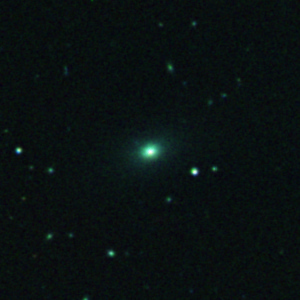


IOU image


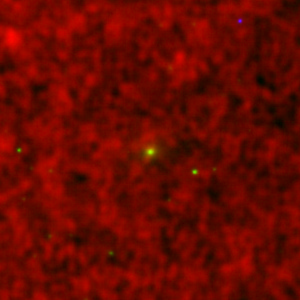


ROR image


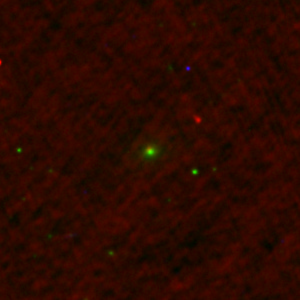

In [17]:
s = ['DSS2 IR','DSS2 Red','DSS2 Blue','WISE 22','GALEX Near UV','NVSS','TGSS ADR1']
image_name = ['IR.jpeg','R.jpeg','B.jpeg','WISE.jpeg','UV.jpeg','NVSS.jpeg','TGSS.jpeg']
i = 0
while i < len(s):
  # Specify the target coordinates and image parameters
  target_coordinates = '19.72343,-1.002'     # By just changing the coordinates will get the output of different images for the specified surveys
  image_size = 0.1  # Size of the image in degrees
  survey = s[i]  # Choose the survey or source

  # Query SkyView for the image
  images = SkyView.get_image_list(
      position=target_coordinates,
      survey=survey)

  if len(images) == 0:
    print(f'unable to download image for the survey : {s[i]}')
  else:
    image_url= images[0]
    # Construct the URL with the target coordinates, survey, and pixel size

    response = requests.get(image_url)
    destination_path = os.path.join('/content/drive/MyDrive/HEA /"19.72343,-1.002"',image_name[i])
    # Check the response status
    if response.status_code == 200:
        # Save the image content to a local file
        with open('/content/drive/MyDrive/HEA', 'wb') as file:
            file.write(response.content)
        print('Image downloaded successfully.')
    else:
        print(f"Failed to download image. Status code: {response.status_code}")

    fits_image = fits.open('/content/drive/MyDrive/HEA')[0]

    # Convert the FITS data to a NumPy array
    fits_data = fits_image.data

    # Normalize the data to the 0-255 range (adjust the scaling as needed)
    min_value = fits_data.min()
    max_value = fits_data.max()
    scaled_data = 255 * (fits_data - min_value) / (max_value - min_value)
    scaled_data = scaled_data.astype('uint8')

    cv2.imwrite(destination_path, scaled_data)
  i+=1


# This part of the code is for the stacking of the image and obtaining the desired output

# this will read the image from the drive
g = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/R.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/IR.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/B.jpeg')
uv= cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/UV.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/WISE.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/NVSS.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/TGSS.jpeg')

# This part of teh code will assign the survey a particular channel in RGB
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]

# Stacking of the image to obtain the Optical RGB, IOU and ROR images
RGB = dstack((B,G,R))
IOU = dstack((UV,R,WISE))
ROR = dstack((NVSS,R,TGSS))
cv2.imwrite('/content/drive/MyDrive/HEA /"19.72343,-1.002"/RGB.jpeg',RGB)
cv2.imwrite('/content/drive/MyDrive/HEA /"19.72343,-1.002"/IOU.jpeg',IOU)
cv2.imwrite('/content/drive/MyDrive/HEA /"19.72343,-1.002"/ROR.jpeg',ROR)

# Geerating the output of the images obtained and ready to do the analysis
print(f'ra:dec :: {target_coordinates}')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

##**3.Code for encountering the error in obtainign the image url**

Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
image not found
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
ra:dec  ::215.0461,10.26292 

optical RGB


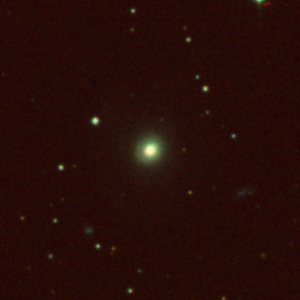


IOU image


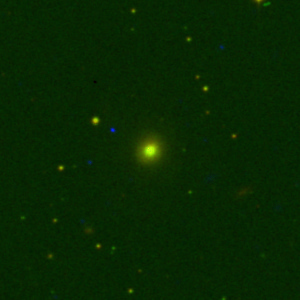


ROR image


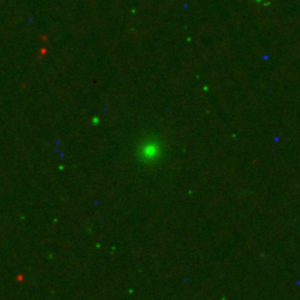

In [18]:
s = ['DSS2 IR','DSS2 Red','DSS2 Blue','WISE 22','GALEX Near UV','NVSS','TGSS ADR1']
image_name = ['IR.jpeg','R.jpeg','B.jpeg','WISE.jpeg','UV.jpeg','NVSS.jpeg','TGSS.jpeg']
i = 0
while i < len(s):
  # Specify the target coordinates and image parameters
  target_coordinates = '215.0461,10.26292'   # By just changing the coordinates will get the output of different images for the specified surveys
  image_size = 0.1  # Size of the image in degrees
  survey = s[i]  # Choose the survey or source

  # Query SkyView for the image
  images = SkyView.get_image_list(
      position=target_coordinates,
      survey=survey)
  destination_path = os.path.join('/content/drive/MyDrive/HEA /"215.0461,10.26292"',image_name[i])

  # This part of the code takes care of the error occured due to the skyview for not extracting the url
  # Since skyview can't generate the image url hence i have manually created a url to the sky view page
  if len(images) == 0:
    print('image not found')
    # This is the manual url created which directs to the desired skyview page for a partiuclar survey and coordinates
    url = f'https://skyview.gsfc.nasa.gov/current/cgi/runquery.pl?position={target_coordinates}&survey={survey}&pixels=300,300'
    response = requests.get(url) # downloads the entire web page in html format

    # This will extrat the html code of the skyview website for a particular survey
    soup = BeautifulSoup(response.text, 'html.parser')

    # this will Locate the Image in the web page
    img_element = soup.find('img', id='img1')  # id locates the image in the html file

    # Geting the downloadable Image URL
    image_url = img_element.get('src')
    b = 'https://skyview.gsfc.nasa.gov'
    a = image_url[5:]
    image_l = str(b+a)

    # Downloading the Image
    image_response = requests.get(image_l)

    if image_response.status_code == 200:
        # Saving the image in the drive
        with open(destination_path, 'wb') as image_file:
            image_file.write(image_response.content)
        print('Image downloaded successfully.')
    else:
        print(f"Failed to download image. Status code: {image_response.status_code}")

    fits_image = fits.open('/content/drive/MyDrive/HEA')[0]

    # Convert the FITS data to a NumPy array
    fits_data = fits_image.data

    # Normalize the data to the 0-255 range (adjust the scaling as needed)
    min_value = fits_data.min()
    max_value = fits_data.max()
    scaled_data = 255 * (fits_data - min_value) / (max_value - min_value)
    scaled_data = scaled_data.astype('uint8')

    cv2.imwrite(destination_path, scaled_data) # This will save the image in drive


    # This is the actual code which gets exicuted most of the time
    # This code exicutes when the Skyview can generate the image url for a partuicular coordinate and survey
  else:
    image_url= images[0]

    # downloading the image in fits format
    response = requests.get(image_url)

    if response.status_code == 200:
        # Save the image content to a local file
        with open('/content/drive/MyDrive/HEA', 'wb') as file:
            file.write(response.content)
        print('Image downloaded successfully.')
    else:
        print(f"Failed to download image. Status code: {response.status_code}")

    fits_image = fits.open('/content/drive/MyDrive/HEA')[0]

    # Convert the FITS data to a NumPy array
    fits_data = fits_image.data

    # Normalize the data to the 0-255 range (adjust the scaling as needed)
    min_value = fits_data.min()
    max_value = fits_data.max()
    scaled_data = 255 * (fits_data - min_value) / (max_value - min_value)
    scaled_data = scaled_data.astype('uint8')

    cv2.imwrite(destination_path, scaled_data)
  i+=1



# This part of the code is for the stacking of the image and obtaining the desired output

# this will read the image from the drive
g = cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/R.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/IR.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/B.jpeg')
uv= cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/UV.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/WISE.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/NVSS.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/TGSS.jpeg')

# This part is for assigning each survey a particluar channel in RGB format
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]

# This part is where I am staking the image to obtain the Optical RGB, IOU and ROR images
RGB = dstack((B,G,R))
IOU = dstack((UV,R,WISE))
ROR = dstack((NVSS,R,TGSS))

# This part is for the displaying the image as output
print(f'ra:dec  ::{target_coordinates} ')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

##**ra : 19.72343 :: dec : -1.002**

Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
ra : 19.72343 :: dec : -1.002

optical RGB


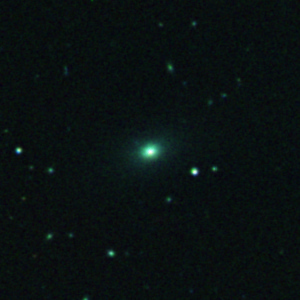


IOU image


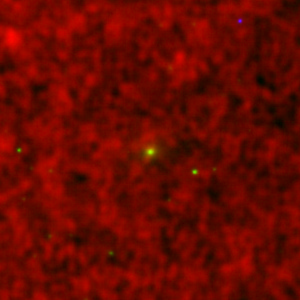


ROR image


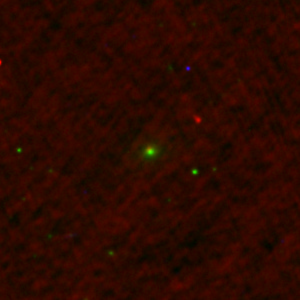

In [ ]:
s = ['DSS2 IR','DSS2 Red','DSS2 Blue','WISE 22','GALEX Near UV','NVSS','TGSS ADR1']
image_name = ['IR.jpeg','R.jpeg','B.jpeg','WISE.jpeg','UV.jpeg','NVSS.jpeg','TGSS.jpeg']
i = 0
while i < len(s):
  # Specify the target coordinates and image parameters
  target_coordinates = '19.72343,-1.002'
  image_size = 0.1  # Size of the image in degrees
  survey = s[i]  # Choose the survey or source

  # Query SkyView for the image
  images = SkyView.get_image_list(
      position=target_coordinates,
      survey=survey)

  if len(images) == 0:
    print(f'unable to download image for the survey : {s[i]}')
  else:
    image_url= images[0]
    # Construct the URL with the target coordinates, survey, and pixel size

    response = requests.get(image_url)
    destination_path = os.path.join('/content/drive/MyDrive/HEA /"19.72343,-1.002"',image_name[i])
    # Check the response status
    if response.status_code == 200:
        # Save the image content to a local file
        with open('/content/drive/MyDrive/HEA', 'wb') as file:
            file.write(response.content)
        print('Image downloaded successfully.')
    else:
        print(f"Failed to download image. Status code: {response.status_code}")

    fits_image = fits.open('/content/drive/MyDrive/HEA')[0]

    # Convert the FITS data to a NumPy array
    fits_data = fits_image.data

    # Normalize the data to the 0-255 range (adjust the scaling as needed)
    min_value = fits_data.min()
    max_value = fits_data.max()
    scaled_data = 255 * (fits_data - min_value) / (max_value - min_value)
    scaled_data = scaled_data.astype('uint8')

    cv2.imwrite(destination_path, scaled_data)
  i+=1

g = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/R.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/IR.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/B.jpeg')
uv= cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/UV.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/WISE.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/NVSS.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/TGSS.jpeg')
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((B,G,R))
IOU = dstack((UV,R,WISE))
ROR = dstack((NVSS,R,TGSS))
cv2.imwrite('/content/drive/MyDrive/HEA /"19.72343,-1.002"/RGB.jpeg',RGB)
cv2.imwrite('/content/drive/MyDrive/HEA /"19.72343,-1.002"/IOU.jpeg',IOU)
cv2.imwrite('/content/drive/MyDrive/HEA /"19.72343,-1.002"/ROR.jpeg',ROR)
print('ra : 19.72343 :: dec : -1.002')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

##**ra : 19.72343 :: dec : -1.002**

Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
ra : 19.72343 :: dec : -1.002

optical RGB


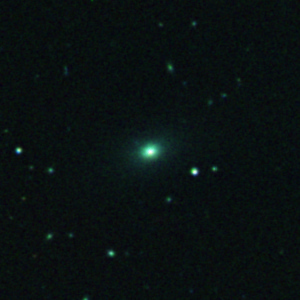


IOU image


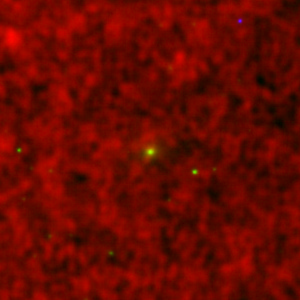


ROR image


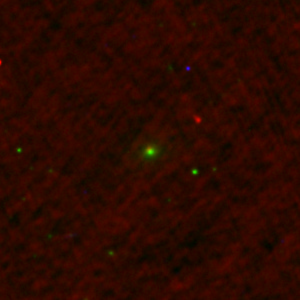

In [ ]:
s = ['DSS2 IR','DSS2 Red','DSS2 Blue','WISE 22','GALEX Near UV','NVSS','TGSS ADR1']
image_name = ['IR.jpeg','R.jpeg','B.jpeg','WISE.jpeg','UV.jpeg','NVSS.jpeg','TGSS.jpeg']
i = 0
while i < len(s):
  # Specify the target coordinates and image parameters
  target_coordinates = '19.72343,-1.002'
  image_size = 0.1  # Size of the image in degrees
  survey = s[i]  # Choose the survey or source

  # Query SkyView for the image
  images = SkyView.get_image_list(
      position=target_coordinates,
      survey=survey)

  if len(images) == 0:
    print(f'unable to download image for the survey : {s[i]}')
  else:
    image_url= images[0]
    # Construct the URL with the target coordinates, survey, and pixel size

    response = requests.get(image_url)
    destination_path = os.path.join('/content/drive/MyDrive/HEA /"19.72343,-1.002"',image_name[i])
    # Check the response status
    if response.status_code == 200:
        # Save the image content to a local file
        with open('/content/drive/MyDrive/HEA', 'wb') as file:
            file.write(response.content)
        print('Image downloaded successfully.')
    else:
        print(f"Failed to download image. Status code: {response.status_code}")

    fits_image = fits.open('/content/drive/MyDrive/HEA')[0]

    # Convert the FITS data to a NumPy array
    fits_data = fits_image.data

    # Normalize the data to the 0-255 range (adjust the scaling as needed)
    min_value = fits_data.min()
    max_value = fits_data.max()
    scaled_data = 255 * (fits_data - min_value) / (max_value - min_value)
    scaled_data = scaled_data.astype('uint8')

    cv2.imwrite(destination_path, scaled_data)
  i+=1

g = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/R.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/IR.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/B.jpeg')
uv= cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/UV.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/WISE.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/NVSS.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"19.72343,-1.002"/TGSS.jpeg')
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((B,G,R))
IOU = dstack((UV,R,WISE))
ROR = dstack((NVSS,R,TGSS))

print('ra : 19.72343 :: dec : -1.002')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

##**ra: 46.88457 :: dec: -0.96454**

ra: 46.88457 :: dec: -0.96454

optical RGB


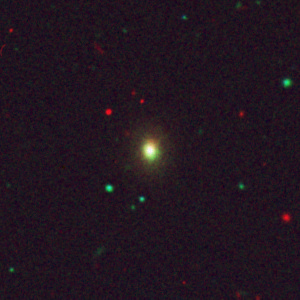


IOU image


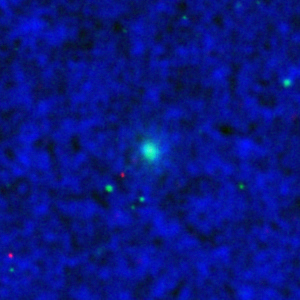


ROR image


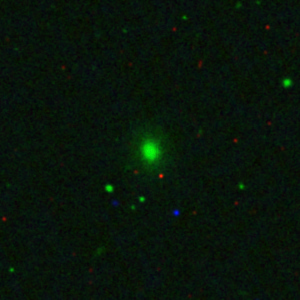

In [ ]:
g = cv2.imread('/content/drive/MyDrive/HEA /"46.88457,-0.96454"/R.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"46.88457,-0.96454"/IR.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"46.88457,-0.96454"/B.jpeg')
uv= cv2.imread('/content/drive/MyDrive/HEA /"46.88457,-0.96454"/UV.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"46.88457,-0.96454"/WISE.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"46.88457,-0.96454"/NVSS.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"46.88457,-0.96454"/TGSS.jpeg')
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((R,G,B))
IOU = dstack((WISE,G,UV))
ROR = dstack((TGSS,G,NVSS))
cv2.imwrite('/content/drive/MyDrive/HEA /"46.88457,-0.96454"/RGB.jpeg',RGB)
cv2.imwrite('/content/drive/MyDrive/HEA /"46.88457,-0.96454"/IOU.jpeg',IOU)
cv2.imwrite('/content/drive/MyDrive/HEA /"46.88457,-0.96454"/ROR.jpeg',ROR)
print('ra: 46.88457 :: dec: -0.96454')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

## **ra: 195.2780304 :: dec: 39.84147263**

ra: 195.2780304 :: dec: 39.84147263

optical RGB


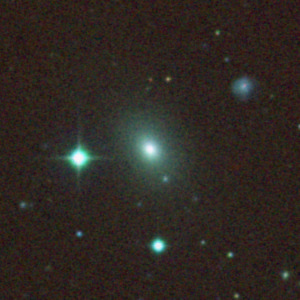


IOU image


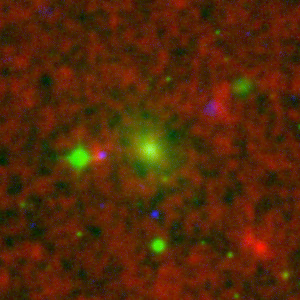


ROR image


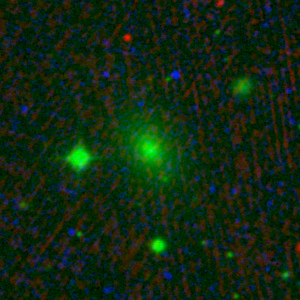

In [ ]:
g = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/G_1.jpg")
r = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/R_1.jpg")
b = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/B_1.jpg")
uv = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/UV_1.jpg")
nvss = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/NVSS_!.jpg")
wise = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/22_1.jpg")
tgss = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/TGSS_1.jpg")
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((B,G,R))
IOU = dstack((UV,G,WISE))
ROR = dstack((NVSS,G,TGSS))
cv2.imwrite('/content/drive/MyDrive/HEA /"195.2780304,39.84147263"/RGB.jpeg',RGB)
cv2.imwrite('/content/drive/MyDrive/HEA /"195.2780304,39.84147263"/IOU.jpeg',IOU)
cv2.imwrite('/content/drive/MyDrive/HEA /"195.2780304,39.84147263"/ROR.jpeg',ROR)
print('ra: 195.2780304 :: dec: 39.84147263')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

##**ra: 224.6499 :: dec : 44.88361**

ra: 224.6499 :: dec : 44.88361

optical RGB


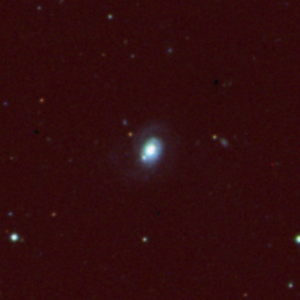


IOU image


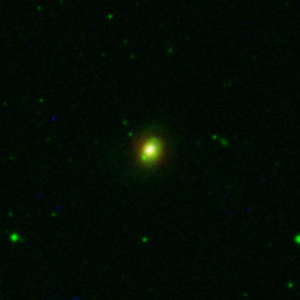


ROR image


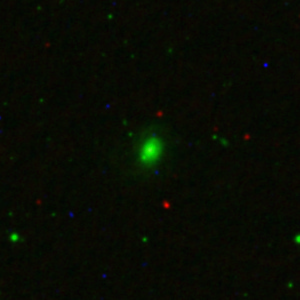

In [ ]:
ir = cv2.imread('/content/drive/MyDrive/HEA /"224.6499,44.88361"/IR.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"224.6499,44.88361"/R.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"224.6499,44.88361"/B.jpeg')
uv = cv2.imread('/content/drive/MyDrive/HEA /"224.6499,44.88361"/UV.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"224.6499,44.88361"/NVSS.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"224.6499,44.88361"/WISE.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"224.6499,44.88361"/TGSS.jpeg')
IR = ir[:,:,2]
R = r[:,:,1]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((B,R,IR))
IOU = dstack((UV,R,WISE))
ROR = dstack((NVSS,R,TGSS))
cv2.imwrite('/content/drive/MyDrive/HEA /"224.6499,44.88361"/RGB.jpeg',RGB)
cv2.imwrite('/content/drive/MyDrive/HEA /"224.6499,44.88361"/IOU.jpeg',IOU)
cv2.imwrite('/content/drive/MyDrive/HEA /"224.6499,44.88361"/ROR.jpeg',ROR)
print('ra: 224.6499 :: dec : 44.88361')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

## **ra: 225.5821228 :: dec: 5.646694183**

ra: 225.5821228 :: dec: 5.646694183

optical RGB


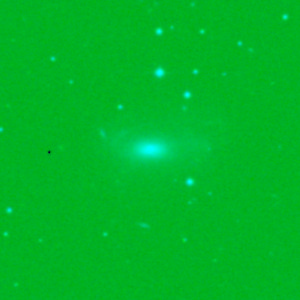


IOU image


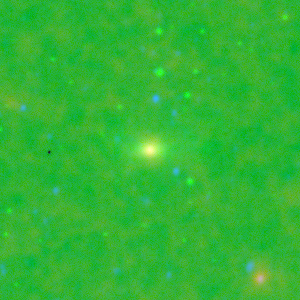


ROR image


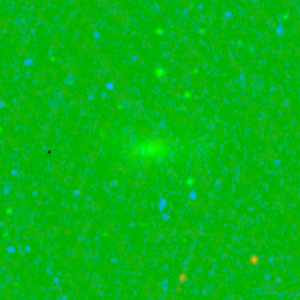

In [ ]:
ir = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/IR_2.jpg")
r = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/R_2.jpg")
b = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/B_2.jpg")
uv = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/UV_2.jpg")
nvss = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/NVSS_2.jpg")
wise = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/WISE_2.jpg")
tgss = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/TGSS_2.jpg")
IR = ir[:,:,2]
R = r[:,:,1]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((B,R,IR))
IOU = dstack((UV,R,WISE))
ROR = dstack((NVSS,R,TGSS))
cv2.imwrite('/content/drive/MyDrive/HEA /"225.5821228,5.646694183"/RGB.jpeg',RGB)
cv2.imwrite('/content/drive/MyDrive/HEA /"225.5821228,5.646694183"/IOU.jpeg',IOU)
cv2.imwrite('/content/drive/MyDrive/HEA /"225.5821228,5.646694183"/ROR.jpeg',ROR)
print('ra: 225.5821228 :: dec: 5.646694183')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

## **ra : 136.0103302	:: dec : 51.47044373**

ra : 136.0103302 :: dec : 51.47044373

optical RGB


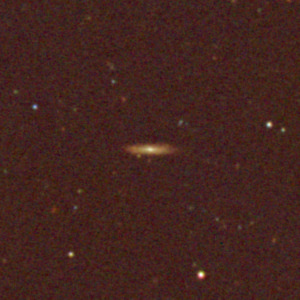


IOU image


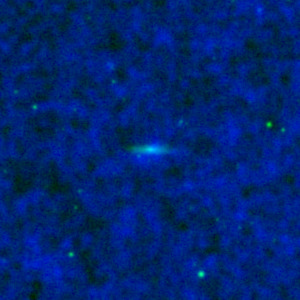


ROR image


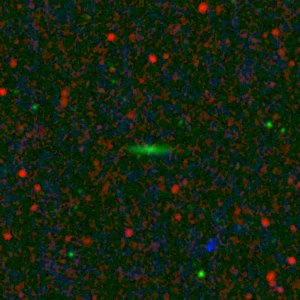

In [ ]:
ir = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/IR_3.jpg")
r = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/R_3.jpg")
b = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/B_3.jpg")
uv = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/UV_3.jpg")
nvss = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/NVSS_3.jpg")
wise = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/WISE_3.jpg")
tgss = cv2.imread("/content/drive/MyDrive/JIGYASA 2020 (Video)/Highenrgy Astro project/TGSS_3.jpg")
IR = ir[:,:,2]
R = r[:,:,1]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((IR,R,B))
IOU = dstack((WISE,R,UV))
ROR = dstack((TGSS,R,NVSS))
cv2.imwrite('/content/drive/MyDrive/HEA /"136.0103302,51.47044373"/RGB.jpeg',RGB)
cv2.imwrite('/content/drive/MyDrive/HEA /"136.0103302,51.47044373"/IOU.jpeg',IOU)
cv2.imwrite('/content/drive/MyDrive/HEA /"136.0103302,51.47044373"/ROR.jpeg',ROR)
print("ra : 136.0103302 :: dec : 51.47044373")
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

##**ra : 240.669 :: dec : 37.35949**

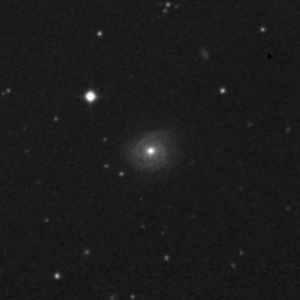

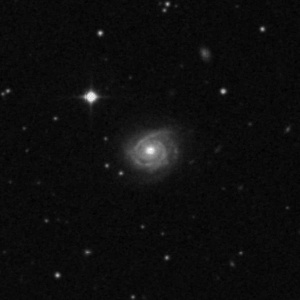

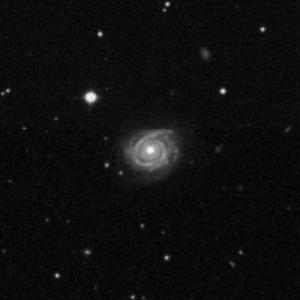

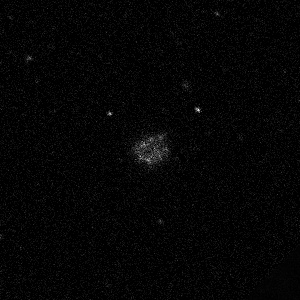

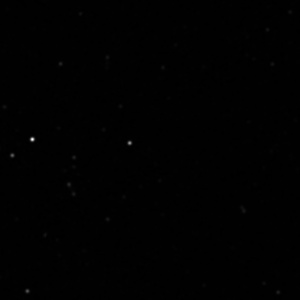

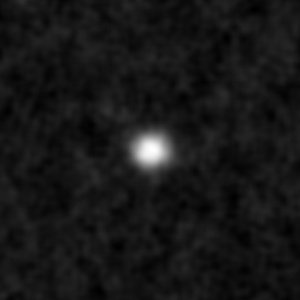

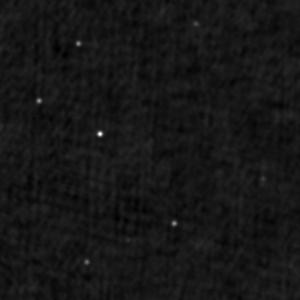

ra: 240.669 :: dec : 37.35949

optical RGB


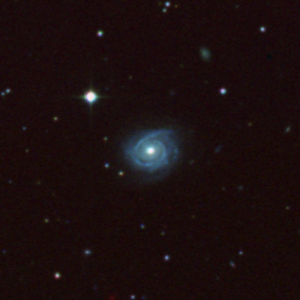


IOU image


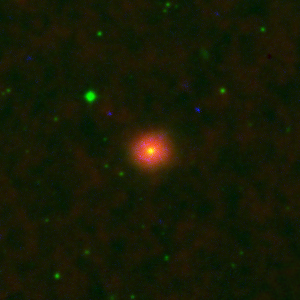


ROR image


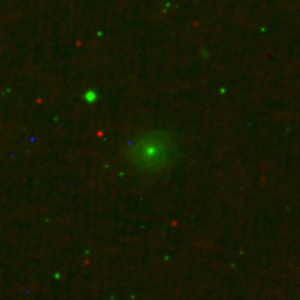

In [ ]:
g = cv2.imread('/content/drive/MyDrive/HEA /"240.669,37.35949"/R.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"240.669,37.35949"/IR.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"240.669,37.35949"/B.jpeg')
uv= cv2.imread('/content/drive/MyDrive/HEA /"240.669,37.35949"/UV.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"240.669,37.35949"/WISE.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"240.669,37.35949"/NVSS.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"240.669,37.35949"/TGSS.jpeg')
cv2_imshow(r)
cv2_imshow(g)
cv2_imshow(b)
cv2_imshow(uv)
cv2_imshow(nvss)
cv2_imshow(wise)
cv2_imshow(tgss)
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((B,G,R))
IOU = dstack((UV,R,WISE))
ROR = dstack((NVSS,R,TGSS))
cv2.imwrite('/content/drive/MyDrive/HEA /"240.669,37.35949"/RGB.jpeg',RGB)
cv2.imwrite('/content/drive/MyDrive/HEA /"240.669,37.35949"/IOU.jpeg',IOU)
cv2.imwrite('/content/drive/MyDrive/HEA /"240.669,37.35949"/ROR.jpeg',ROR)
print('ra: 240.669 :: dec : 37.35949')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

##**ra : 116.6571 :: dec : 44.79052**

Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
ra: 116.6571 :: dec : 44.79052

optical RGB


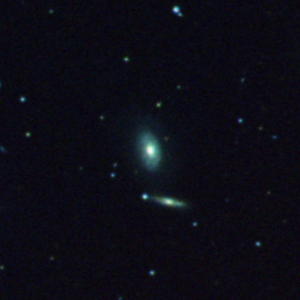


IOU image


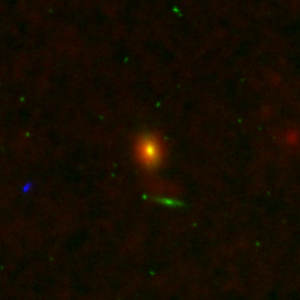


ROR image


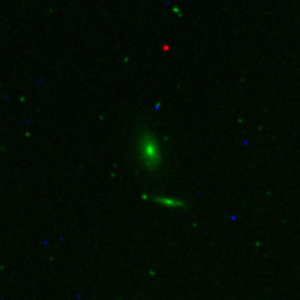

In [ ]:
s = ['DSS2 IR','DSS2 Red','DSS2 Blue','WISE 22','GALEX Near UV','NVSS','TGSS ADR1']
image_name = ['IR.jpeg','R.jpeg','B.jpeg','WISE.jpeg','UV.jpeg','NVSS.jpeg','TGSS.jpeg']
i = 0
while i < len(s):
  # Specify the target coordinates and image parameters
  target_coordinates = '116.6571,44.79052'
  image_size = 0.1  # Size of the image in degrees
  survey = s[i]  # Choose the survey or source

  # Query SkyView for the image
  images = SkyView.get_image_list(
      position=target_coordinates,
      survey=survey)

  if len(images) == 0:
    print(f'unable to download image for the survey : {s[i]}')
  else:
    image_url= images[0]
    # Construct the URL with the target coordinates, survey, and pixel size

    response = requests.get(image_url)
    destination_path = os.path.join('/content/drive/MyDrive/HEA /"116.6571,44.79052"',image_name[i])
    # Check the response status
    if response.status_code == 200:
        # Save the image content to a local file
        with open('/content/drive/MyDrive/HEA', 'wb') as file:
            file.write(response.content)
        print('Image downloaded successfully.')
    else:
        print(f"Failed to download image. Status code: {response.status_code}")

    fits_image = fits.open('/content/drive/MyDrive/HEA')[0]

    # Convert the FITS data to a NumPy array
    fits_data = fits_image.data

    # Normalize the data to the 0-255 range (adjust the scaling as needed)
    min_value = fits_data.min()
    max_value = fits_data.max()
    scaled_data = 255 * (fits_data - min_value) / (max_value - min_value)
    scaled_data = scaled_data.astype('uint8')

    cv2.imwrite(destination_path, scaled_data)
  i+=1

g = cv2.imread('/content/drive/MyDrive/HEA /"116.6571,44.79052"/R.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"116.6571,44.79052"/IR.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"116.6571,44.79052"/B.jpeg')
uv= cv2.imread('/content/drive/MyDrive/HEA /"116.6571,44.79052"/UV.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"116.6571,44.79052"/WISE.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"116.6571,44.79052"/NVSS.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"116.6571,44.79052"/TGSS.jpeg')
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((B,G,R))
IOU = dstack((UV,R,WISE))
ROR = dstack((NVSS,R,TGSS))
cv2.imwrite('/content/drive/MyDrive/HEA /"116.6571,44.79052"/RGB.jpeg',RGB)
cv2.imwrite('/content/drive/MyDrive/HEA /"116.6571,44.79052"/IOU.jpeg',IOU)
cv2.imwrite('/content/drive/MyDrive/HEA /"116.6571,44.79052"/ROR.jpeg',ROR)
print('ra: 116.6571 :: dec : 44.79052')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

##**ra : 169.0583 :: dec : 55.70429**

Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
ra: 330.8167 :: dec : 0.571094

optical RGB


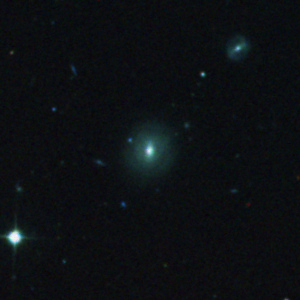


IOU image


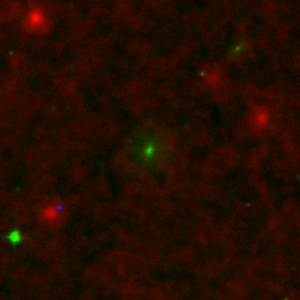


ROR image


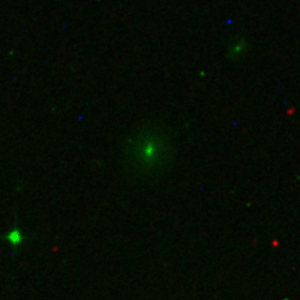

In [ ]:
s = ['DSS2 IR','DSS2 Red','DSS2 Blue','WISE 22','GALEX Near UV','NVSS','TGSS ADR1']
image_name = ['IR.jpeg','R.jpeg','B.jpeg','WISE.jpeg','UV.jpeg','NVSS.jpeg','TGSS.jpeg']
i = 0
while i < len(s):
  # Specify the target coordinates and image parameters
  target_coordinates = '169.0583,55.70429'
  image_size = 0.1  # Size of the image in degrees
  survey = s[i]  # Choose the survey or source

  # Query SkyView for the image
  images = SkyView.get_image_list(
      position=target_coordinates,
      survey=survey)

  if len(images) == 0:
    print(f'unable to download image for the survey : {s[i]}')
  else:
    image_url= images[0]
    # Construct the URL with the target coordinates, survey, and pixel size

    response = requests.get(image_url)
    destination_path = os.path.join('/content/drive/MyDrive/HEA /"169.0583,55.70429"',image_name[i])
    # Check the response status
    if response.status_code == 200:
        # Save the image content to a local file
        with open('/content/drive/MyDrive/HEA', 'wb') as file:
            file.write(response.content)
        print('Image downloaded successfully.')
    else:
        print(f"Failed to download image. Status code: {response.status_code}")

    fits_image = fits.open('/content/drive/MyDrive/HEA')[0]

    # Convert the FITS data to a NumPy array
    fits_data = fits_image.data

    # Normalize the data to the 0-255 range (adjust the scaling as needed)
    min_value = fits_data.min()
    max_value = fits_data.max()
    scaled_data = 255 * (fits_data - min_value) / (max_value - min_value)
    scaled_data = scaled_data.astype('uint8')

    cv2.imwrite(destination_path, scaled_data)
  i+=1

g = cv2.imread('/content/drive/MyDrive/HEA /"169.0583,55.70429"/R.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"169.0583,55.70429"/IR.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"169.0583,55.70429"/B.jpeg')
uv= cv2.imread('/content/drive/MyDrive/HEA /"169.0583,55.70429"/UV.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"169.0583,55.70429"/WISE.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"169.0583,55.70429"/NVSS.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"169.0583,55.70429"/TGSS.jpeg')
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((B,G,R))
IOU = dstack((UV,R,WISE))
ROR = dstack((NVSS,R,TGSS))
cv2.imwrite('/content/drive/MyDrive/HEA /"169.0583,55.70429"/RGB.jpeg',RGB)
cv2.imwrite('/content/drive/MyDrive/HEA /"169.0583,55.70429"/IOU.jpeg',IOU)
cv2.imwrite('/content/drive/MyDrive/HEA /"169.0583,55.70429"/ROR.jpeg',ROR)
print('ra: 330.8167 :: dec : 0.571094')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

##**ra: 183.5919 :: dec : 56.01144**

In [ ]:
g = cv2.imread('/content/drive/MyDrive/HEA /"183.5919,56.01144"/R.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"183.5919,56.01144"/IR.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"183.5919,56.01144"/B.jpeg')
uv= cv2.imread('/content/drive/MyDrive/HEA /"183.5919,56.01144"/UV.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"183.5919,56.01144"/WISE.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"183.5919,56.01144"/NVSS.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"183.5919,56.01144"/TGSS.jpeg')
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((R,G,B))
IOU = dstack((WISE,G,UV))
ROR = dstack((TGSS,G,NVSS))
cv2.imwrite('/content/drive/MyDrive/HEA /"183.5919,56.01144"/RGB.jpeg',RGB)
cv2.imwrite('/content/drive/MyDrive/HEA /"183.5919,56.01144"/IOU.jpeg',IOU)
cv2.imwrite('/content/drive/MyDrive/HEA /"183.5919,56.01144"/ROR.jpeg',ROR)
print('ra: 183.5919 :: dec : 56.01144')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

##**ra: 330.8167 :: dec : 0.571094**

ra: 330.8167 :: dec : 0.571094

optical RGB


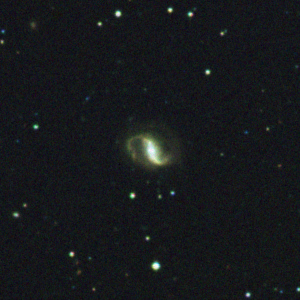


IOU image


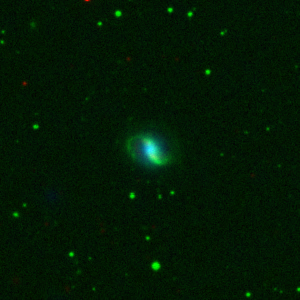


ROR image


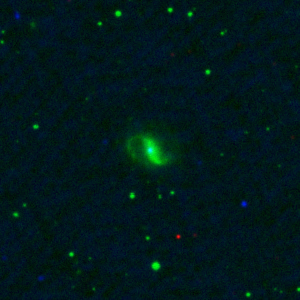

In [ ]:
g = cv2.imread('/content/drive/MyDrive/HEA /"330.8167,0.571094"/R.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"330.8167,0.571094"/IR.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"330.8167,0.571094"/B.jpeg')
uv= cv2.imread('/content/drive/MyDrive/HEA /"330.8167,0.571094"/UV.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"330.8167,0.571094"/WISE.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"330.8167,0.571094"/NVSS.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"330.8167,0.571094"/TGSS.jpeg')
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((R,G,B))
IOU = dstack((WISE,G,UV))
ROR = dstack((TGSS,G,NVSS))
cv2.imwrite('/content/drive/MyDrive/HEA /"330.8167,0.571094"/RGB.jpeg',RGB)
cv2.imwrite('/content/drive/MyDrive/HEA /"330.8167,0.571094"/IOU.jpeg',IOU)
cv2.imwrite('/content/drive/MyDrive/HEA /"330.8167,0.571094"/ROR.jpeg',ROR)
print('ra: 330.8167 :: dec : 0.571094')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

##**Testing Window**

Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
image not found
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
ra:dec  ::215.0461,10.26292 

optical RGB


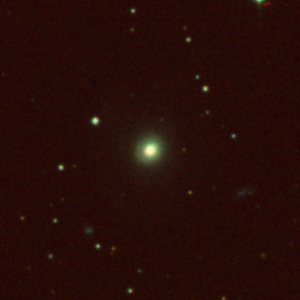


IOU image


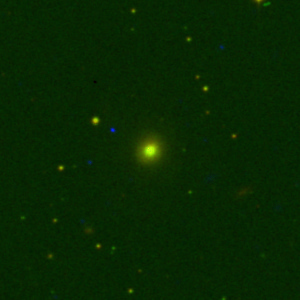


ROR image


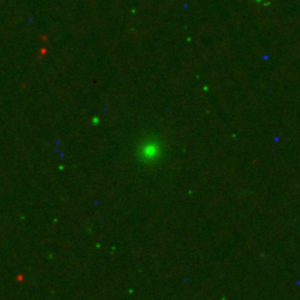

In [16]:
s = ['DSS2 IR','DSS2 Red','DSS2 Blue','WISE 22','GALEX Near UV','NVSS','TGSS ADR1']
image_name = ['IR.jpeg','R.jpeg','B.jpeg','WISE.jpeg','UV.jpeg','NVSS.jpeg','TGSS.jpeg']
i = 0
while i < len(s):
  # Specify the target coordinates and image parameters
  target_coordinates = '215.0461,10.26292'
  image_size = 0.1  # Size of the image in degrees
  survey = s[i]  # Choose the survey or source

  # Query SkyView for the image
  images = SkyView.get_image_list(
      position=target_coordinates,
      survey=survey)
  destination_path = os.path.join('/content/drive/MyDrive/HEA /"215.0461,10.26292"',image_name[i])

  # This part of the code takes care of the error occured due to the skyview for not extracting the url
  # Since skyview can't generate the image url hence i have manually created a url to the sky view page
  if len(images) == 0:
    print('image not found')
    # This is the manual url created which directs to the desired skyview page for a partiuclar survey and coordinates
    url = f'https://skyview.gsfc.nasa.gov/current/cgi/runquery.pl?position={target_coordinates}&survey={survey}&pixels=300,300'
    response = requests.get(url) # downloads the entire web page in html format

    # This will extrat the html code of the skyview website for a particular survey
    soup = BeautifulSoup(response.text, 'html.parser')

    # this will Locate the Image in the web page
    img_element = soup.find('img', id='img1')  # id locates the image in the html file

    # Geting the downloadable Image URL
    image_url = img_element.get('src')
    b = 'https://skyview.gsfc.nasa.gov'
    a = image_url[5:]
    image_l = str(b+a)

    # Downloading the Image
    image_response = requests.get(image_l)

    if image_response.status_code == 200:
        # Saving the image in the drive
        with open(destination_path, 'wb') as image_file:
            image_file.write(image_response.content)
        print('Image downloaded successfully.')
    else:
        print(f"Failed to download image. Status code: {image_response.status_code}")

    fits_image = fits.open('/content/drive/MyDrive/HEA')[0]

    # Convert the FITS data to a NumPy array
    fits_data = fits_image.data

    # Normalize the data to the 0-255 range (adjust the scaling as needed)
    min_value = fits_data.min()
    max_value = fits_data.max()
    scaled_data = 255 * (fits_data - min_value) / (max_value - min_value)
    scaled_data = scaled_data.astype('uint8')

    cv2.imwrite(destination_path, scaled_data) # This will save the image in drive


    # This is the actual code which gets exicuted most of the time
    # This code exicutes when the Skyview can generate the image url for a partuicular coordinate and survey
  else:
    image_url= images[0]

    # downloading the image in fits format
    response = requests.get(image_url)

    if response.status_code == 200:
        # Save the image content to a local file
        with open('/content/drive/MyDrive/HEA', 'wb') as file:
            file.write(response.content)
        print('Image downloaded successfully.')
    else:
        print(f"Failed to download image. Status code: {response.status_code}")

    fits_image = fits.open('/content/drive/MyDrive/HEA')[0]

    # Convert the FITS data to a NumPy array
    fits_data = fits_image.data

    # Normalize the data to the 0-255 range (adjust the scaling as needed)
    min_value = fits_data.min()
    max_value = fits_data.max()
    scaled_data = 255 * (fits_data - min_value) / (max_value - min_value)
    scaled_data = scaled_data.astype('uint8')

    cv2.imwrite(destination_path, scaled_data)
  i+=1



# This part of the code is for the stacking of the image and obtaining the desired output

# this will read the image from the drive
g = cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/R.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/IR.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/B.jpeg')
uv= cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/UV.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/WISE.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/NVSS.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"215.0461,10.26292"/TGSS.jpeg')

# This part is for assigning each survey a particluar channel in RGB format
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]

# This part is where I am staking the image to obtain the Optical RGB, IOU and ROR images
RGB = dstack((B,G,R))
IOU = dstack((UV,R,WISE))
ROR = dstack((NVSS,R,TGSS))

# This part is for the displaying the image as output
print(f'ra:dec  ::{target_coordinates} ')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

In [15]:
s = ['DSS2 IR','DSS2 Red','DSS2 Blue','WISE 22','GALEX Near UV','NVSS','TGSS ADR1']
image_name = ['IR.jpeg','R.jpeg','B.jpeg','WISE.jpeg','UV.jpeg','NVSS.jpeg','TGSS.jpeg']
i = 0
while i < len(s):
  # Specify the target coordinates and image parameters
  target_coordinates = '197.158,43.73753'
  image_size = 0.1  # Size of the image in degrees
  survey = s[i]  # Choose the survey or source

  # Query SkyView for the image
  images = SkyView.get_image_list(
      position=target_coordinates,
      survey=survey)
  destination_path = os.path.join('/content/drive/MyDrive/HEA /"197.158,43.73753"',image_name[i])

  url = f'https://skyview.gsfc.nasa.gov/current/cgi/runquery.pl?position={target_coordinates}&survey={survey}&pixels=300,300'
  response = requests.get(url)

  # Step 4: Parse HTML content
  soup = BeautifulSoup(response.text, 'html.parser')

  # Step 5: Locate the Image
  img_element = soup.find('img', id='img1')  # Replace 'image_id' with the actual ID or other attribute of the image element.

  # Step 6: Get the Image URL
  image_url = img_element.get('src')
  b = 'https://skyview.gsfc.nasa.gov'
  a = image_url[5:]
  image_l = b+a
  # Step 7: Download the Image
  image_response = requests.get(image_l)

  if image_response.status_code == 200:
      # Save the image content to a local file
      with open(destination_path, 'wb') as image_file:
          image_file.write(image_response.content)
      print('Image downloaded successfully.')
  else:
      print(f"Failed to download image. Status code: {image_response.status_code}")
  i+=1
g = cv2.imread('/content/drive/MyDrive/HEA /"197.158,43.73753"/R.jpeg')
r = cv2.imread('/content/drive/MyDrive/HEA /"197.158,43.73753"/IR.jpeg')
b = cv2.imread('/content/drive/MyDrive/HEA /"197.158,43.73753"/B.jpeg')
uv= cv2.imread('/content/drive/MyDrive/HEA /"197.158,43.73753"/UV.jpeg')
wise = cv2.imread('/content/drive/MyDrive/HEA /"197.158,43.73753"/WISE.jpeg')
nvss = cv2.imread('/content/drive/MyDrive/HEA /"197.158,43.73753"/NVSS.jpeg')
tgss = cv2.imread('/content/drive/MyDrive/HEA /"197.158,43.73753"/TGSS.jpeg')
G = g[:,:,1]
R = r[:,:,2]
B = b[:,:,0]
UV = uv[:,:,0]
WISE = wise[:,:,2]
NVSS = nvss[:,:,0]
TGSS = tgss[:,:,2]
RGB = dstack((B,G,R))
IOU = dstack((UV,R,WISE))
ROR = dstack((NVSS,R,TGSS))
print('ra: 197.158 :: dec : 43.73753')
print()
print('optical RGB')
cv2_imshow(RGB)
print()
print('IOU image')
cv2_imshow(IOU)
print()
print('ROR image')
cv2_imshow(ROR)

Image downloaded successfully.
Image downloaded successfully.


KeyboardInterrupt: ignored

**Trying to plot the contour**

4000    2.20187
4001    2.18399
4002    2.13612
4003    2.13116
4004    2.07015
         ...   
5995    1.92902
5996    1.90347
5997    1.88193
5998    1.88071
5999    1.87010
Name: RA, Length: 2000, dtype: float64 4000     4.40347
4001     4.64616
4002     5.28537
4003     4.05237
4004     4.62246
          ...   
5995    23.80637
5996    25.09469
5997    25.82441
5998    25.94472
5999    25.11924
Name: DEC, Length: 2000, dtype: float64 4000    290.1
4001     37.8
4002     49.9
4003     47.7
4004     44.5
        ...  
5995     38.1
5996     34.2
5997     80.9
5998     51.7
5999     20.3
Name: Total_flux, Length: 2000, dtype: float64
[[290.1   0.    0.  ...   0.    0.    0. ]
 [  0.   37.8   0.  ...   0.    0.    0. ]
 [  0.    0.   49.9 ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ...  80.9   0.    0. ]
 [  0.    0.    0.  ...   0.   51.7   0. ]
 [  0.    0.    0.  ...   0.    0.   20.3]]


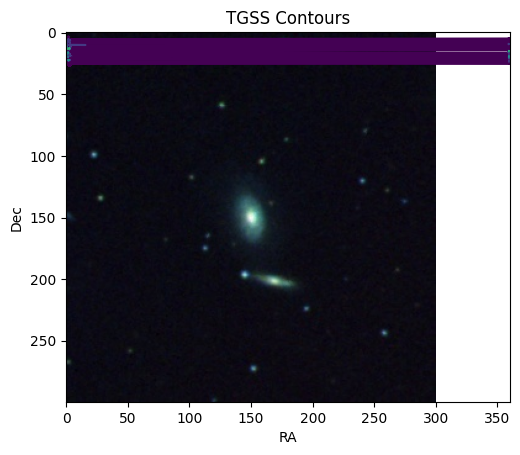

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from numpy import *
# Load TGSS contour data
tgss_contours = pd.read_csv('/content/drive/MyDrive/HEA /TGSS.tsv', sep='\t')

# Load RGB image
rgb_image = imread('/content/drive/MyDrive/HEA /"116.6571,44.79052"/RGB.jpeg')

# Create a plot
plt.imshow(rgb_image)


x = tgss_contours['RA'][4000:6000]
y = tgss_contours['DEC'][4000:6000]

t = tgss_contours['Total_flux'][4000:6000]
print(x,y,t)
RA,DEC = meshgrid(x,y)

input_value = 116.6571
# Value to find the closest to
closest_value = min(x, key=lambda t: abs(t - input_value))
a = closest_value

# Define the size of the n*n matrix
n = len(t)

# Create an n*n matrix with all zeros
matrix = zeros((n, n))

# Add values only along the diagonal
i = 4000
while i < 6000:
    matrix[i-4000, i-4000] = t[i]  # Set the diagonal elements to 1
    i+=1

# Print the resulting matrix
print(matrix)

plt.contour(RA,DEC,matrix)
# Add labels and title
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('TGSS Contours')

# Show the plot
plt.show()



In [14]:
s = ['DSS2 IR','DSS2 Red','DSS2 Blue','WISE 22','GALEX Near UV','NVSS','TGSS ADR1']
image_name = ['IR.jpeg','R.jpeg','B.jpeg','WISE.jpeg','UV.jpeg','NVSS.jpeg','TGSS.jpeg']
i = 0
while i < len(s):
  # Specify the target coordinates and image parameters
  target_coordinates = '197.158,43.73753'
  image_size = 0.1  # Size of the image in degrees
  survey = s[i]  # Choose the survey or source

  # Query SkyView for the image
  images = SkyView.get_image_list(
      position=target_coordinates,
      survey=survey)
  destination_path = os.path.join('/content/drive/MyDrive/HEA /"197.158,43.73753"',image_name[i])

  url = f'https://skyview.gsfc.nasa.gov/current/cgi/runquery.pl?position={target_coordinates}&survey={survey}&pixels=300,300'
  response = requests.get(url)

  # Step 4: Parse HTML content
  soup = BeautifulSoup(response.text, 'html.parser')

  # Step 5: Locate the Image
  img_element = soup.find('img', id='img1')  # Replace 'image_id' with the actual ID or other attribute of the image element.

  # Step 6: Get the Image URL
  image_url = img_element.get('src')
  b = 'https://skyview.gsfc.nasa.gov'
  a = image_url[5:]
  print(a)
  print(image_url)
  i+=1

/tempspace/fits/skv664466557917.jpg
../../tempspace/fits/skv664466557917.jpg
/tempspace/fits/skv664469364362.jpg
../../tempspace/fits/skv664469364362.jpg
/tempspace/fits/skv664472848445.jpg
../../tempspace/fits/skv664472848445.jpg


KeyboardInterrupt: ignored